In [17]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import math
import numpy as np
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt


importy

In [18]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
max = np.ones(6)
min = np.zeros(6)
my_bounds = (min, max)

c1 - współczynnik dążenia do najlepszego indywidualnego rozwiązania (cognitive parameter)

c2 - współczynnik dążenia do najlepszego lokalnego rozwiązania (social parameter)

w - współczynnik bezwładności, określa wpływ prędkości z poprzedniego kroku (inertia)

min, max - ograniczenia dla obszaru

In [19]:
# x, y, z, u, v, w
def endurance(args):
    return -math.exp(-2*(args[1]-math.sin(args[0]))**2)+math.sin(args[2]*args[3])+math.cos(args[4]*args[5])

def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

funkcja zwracajaca wynik wytrzymalosci (minus zeby szukalo maximum)

funkcja f przebiega po calym roju uruchamiajac dla kazdej czastki funkcje endurance

In [20]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options,bounds=my_bounds)
optimizer.optimize(f, iters=1000)

2023-03-21 20:44:15,166 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-.405
2023-03-21 20:44:16,212 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.40491469573061833, best pos: [0.45795904 0.42321058 0.03240611 0.70083327 0.96649797 0.9956226 ]


(-0.40491469573061833,
 array([0.45795904, 0.42321058, 0.03240611, 0.70083327, 0.96649797,
        0.9956226 ]))

wyniki optymalizacji

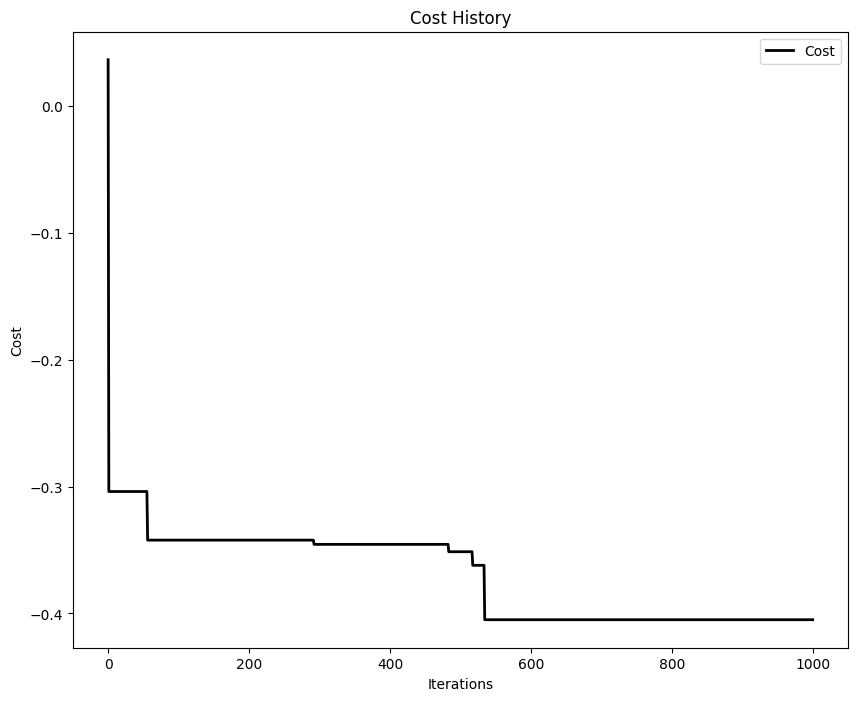

In [21]:
# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

# Plot!
plot_cost_history(cost_history)
plt.show()

wykres kosztu